In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np

print(tf.__version__)

2.11.0


In [3]:
x_data = np.array([[1,2,0],[5,4,3],[1,2,-1],[3,1,0],[2,4,2],
                  [4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],
                  [1,-2,-2],[0,1,3],[1,1,3],[0,1,4],[2,3,3]])

t_data = np.array([-4,4,-6,3,-4,
                   9,-7,5,6,0,
                   4,3,5,5,1])

print("x_data.shape: ", x_data.shape, "t_data.shape: ", t_data.shape)

x_data.shape:  (15, 3) t_data.shape:  (15,)


In [4]:
model = Sequential()

model.add(Dense(1, input_shape=(3,), activation='linear'))

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 714ms/step - loss: 28.4962
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 24.4161
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 21.7289
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 19.7856
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 18.2599
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 16.9854
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 15.8757
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 14.8837
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 13.9829
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 13.1570
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 12.3950
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 11.6891
Epoch 13/1000
1/1 [=====

In [6]:
test_data = [[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]]

ret_val = [2*data[0] - 3*data[1] + 2*data[2] for data in test_data]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print("===============")
print(ret_val)

1/1 [==============================] - 0s 92ms/step
[[-5.0003023]
 [-2.9999158]
 [-3.9992578]
 [ 8.999137 ]
 [ 7.000455 ]]
[-5, -3, -4, 9, 7]


In [9]:
print(model.input) # 모델 입력
print(model.output) # 모델 출력
print(model.weights) # 모델 가중치

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999121],
       [-3.0000913],
       [ 1.9999394]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00059395], dtype=float32)>]


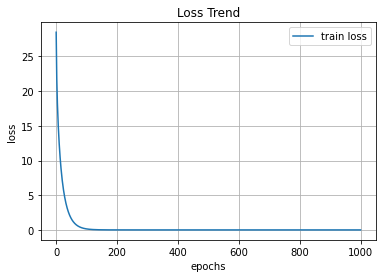

In [12]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()